<a href="https://colab.research.google.com/github/Debora-Ibarra/Repositorio-EDP-1/blob/main/IntegralFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

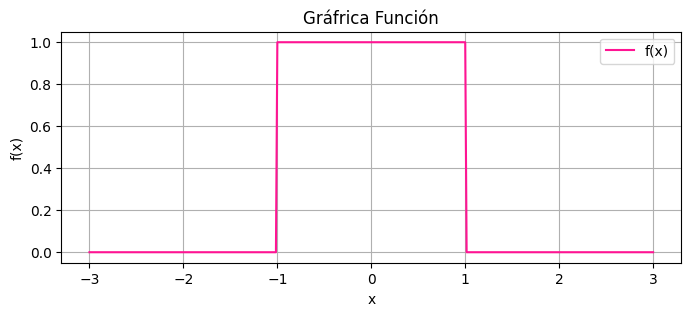

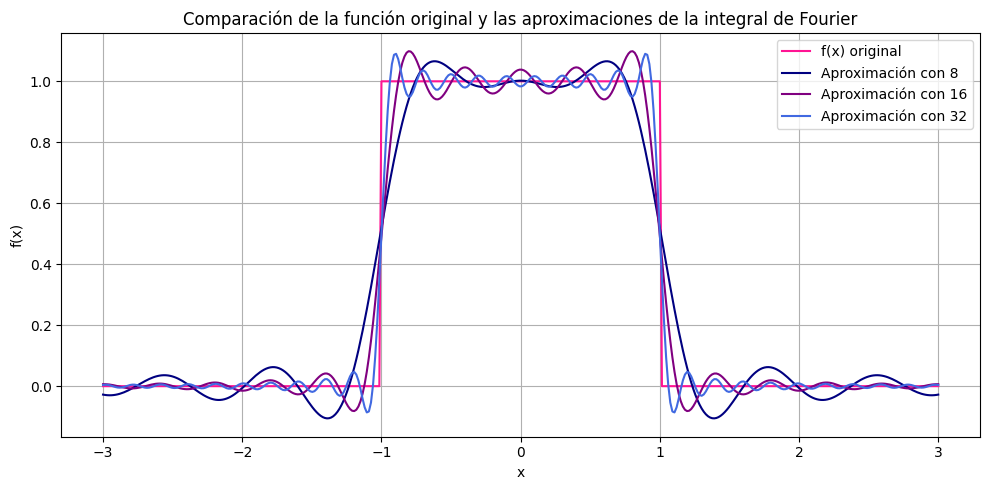

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad

x_vals = np.linspace(-3, 3, 400)
f_vals = np.where(np.abs(x_vals) <= 1, 1, 0)

plt.figure(figsize=(8, 3))
plt.plot(x_vals, f_vals, label='f(x)', color='deeppink')
plt.title("Gráfrica Función")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

x, t, w = sp.symbols('x t omega', real=True)
f_t = sp.Piecewise((1, (t >= -1) & (t <= 1)), (0, True))


a_w = sp.integrate(f_t * sp.cos(w * t), (t, -sp.oo, sp.oo))
b_w = sp.integrate(f_t * sp.sin(w * t), (t, -sp.oo, sp.oo))

def f_approx(x_array, w_max):

    result = []
    for x in x_array:
        integrand = lambda w: (2/np.pi) * (np.sin(w)/w) * np.cos(w * x)
        integral_val, _ = quad(integrand, 0, w_max)
        result.append(integral_val)
    return np.array(result)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label='f(x) original', color="deeppink")

approx_vals = f_approx(x_vals, 8)
plt.plot(x_vals, approx_vals, label=f'Aproximación con 8', color="navy")

approx_vals = f_approx(x_vals, 16)
plt.plot(x_vals, approx_vals, label=f'Aproximación con 16', color="purple")

approx_vals = f_approx(x_vals, 32)
plt.plot(x_vals, approx_vals, label=f'Aproximación con 32', color="royalblue")


plt.title("Comparación de la función original y las aproximaciones de la integral de Fourier")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
